# Start

## Drive mount

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
import os
os.chdir('/content/drive/My Drive/Thesis2')

Mounted at /content/drive


## Libraries

In [2]:
!pip install statsforecast mlforecast neuralforecast s3fs pyarrow datasetsforecast lightgbm xgboost fastparquet dask distributed
import pandas as pd
import numpy as np
import os
os.environ['NIXTLA_ID_AS_COL'] = '1'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.5/221.5 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.5/223.5 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.2/812.2 kB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 MB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.9/176.9 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

# Initial data for testing  

## Import Germany test data Uni

In [ ]:
Y_df_test = pd.read_csv('Processed data/Y_df_test.csv')

Y_df_test['ds'] = pd.to_datetime(Y_df_test['ds'])
Y_df_test = Y_df_test.sort_values(by=['unique_id', 'ds'])

Y_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189728 entries, 0 to 189727
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   unique_id  189728 non-null  object        
 1   ds         189728 non-null  datetime64[ns]
 2   y          189728 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 4.3+ MB


In [ ]:
Y_df_test

,unique_id,ds,y
0,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2020-03-22,2.231068
1,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2020-03-23,1.459568
2,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2020-03-24,1.001031
3,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2020-03-25,0.347170
4,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2020-03-26,0.487360
...,...,...,...
189723,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-10-27,28.709540
189724,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-10-28,22.018717
189725,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-10-29,24.213691
189726,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-10-30,19.556713


In [ ]:
import pandas as pd

# Assuming your DataFrame is named df
# Group by unique_id and calculate the length of each time series
lengths = Y_df_test.groupby('unique_id')['ds'].count()

# Create a histogram table
histogram_table = pd.DataFrame({'unique_id': lengths.index, 'length': lengths.values})

# Group by length and count the frequency
frequency_table = histogram_table.groupby('length').size().reset_index(name='frequency')

# Sort by length if necessary
frequency_table = frequency_table.sort_values(by='length')

print(frequency_table)

   length  frequency
0     224        847


# spliting 224 into 96 (df1/4)

Since the model was trained to a 96 step ahead horizon, it will always predict 96. For this the model test data is divided by two sets of 96 and a remaining set of 32

224/96 = 2.333...
224-192 = 32

## Univariate

In [ ]:
# Function to split DataFrame into df2 and df3
def split_timeseries(df):
    # Create empty DataFrames for df2 and df3
    df2 = pd.DataFrame()
    df3 = pd.DataFrame()

    # Loop through each unique_id
    for unique_id in df['unique_id'].unique():
        # Filter rows for the current unique_id
        df_id = df[df['unique_id'] == unique_id]

        # Sort by time to ensure order
        df_id = df_id.sort_values(by='ds')

        # Split the DataFrame into first 96 timesteps and the rest
        df_id_2 = df_id.iloc[:96]
        df_id_3 = df_id.iloc[96:]

        # Append to the result DataFrames
        df2 = pd.concat([df2, df_id_2], ignore_index=True)
        df3 = pd.concat([df3, df_id_3], ignore_index=True)

    return df2, df3

# Assuming your original DataFrame is named df
df2_Uni, df3_Uni = split_timeseries(Y_df_test)
df3_Uni, df4_Uni = split_timeseries(df3_Uni)

In [ ]:
df2_Uni

,unique_id,ds,y
0,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2020-03-22,2.231068
1,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2020-03-23,1.459568
2,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2020-03-24,1.001031
3,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2020-03-25,0.347170
4,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2020-03-26,0.487360
...,...,...,...
81307,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-06-21,31.999573
81308,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-06-22,20.130372
81309,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-06-23,18.361196
81310,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-06-24,25.944551


In [ ]:
import pandas as pd

# Assuming your DataFrame is named df
# Group by unique_id and calculate the length of each time series
lengths = df2_Uni.groupby('unique_id')['ds'].count()

# Create a histogram table
histogram_table = pd.DataFrame({'unique_id': lengths.index, 'length': lengths.values})

# Group by length and count the frequency
frequency_table = histogram_table.groupby('length').size().reset_index(name='frequency')

# Sort by length if necessary
frequency_table = frequency_table.sort_values(by='length')

print(frequency_table)

# Assuming your DataFrame is named df
# Group by unique_id and calculate the length of each time series
lengths = df3_Uni.groupby('unique_id')['ds'].count()

# Create a histogram table
histogram_table = pd.DataFrame({'unique_id': lengths.index, 'length': lengths.values})

# Group by length and count the frequency
frequency_table = histogram_table.groupby('length').size().reset_index(name='frequency')

# Sort by length if necessary
frequency_table = frequency_table.sort_values(by='length')

print(frequency_table)

lengths = df4_Uni.groupby('unique_id')['ds'].count()

# Create a histogram table
histogram_table = pd.DataFrame({'unique_id': lengths.index, 'length': lengths.values})

# Group by length and count the frequency
frequency_table = histogram_table.groupby('length').size().reset_index(name='frequency')

# Sort by length if necessary
frequency_table = frequency_table.sort_values(by='length')

print(frequency_table)

   length  frequency
0      96        847
   length  frequency
0      96        847
   length  frequency
0      32        847


# Adding up the train validation set (train_test)

## Univariate

In [ ]:
Y_df_train = pd.read_csv('Data Imputation/Y_imp_df_train.csv')

Y_df_train['ds'] = pd.to_datetime(Y_df_train['ds'])

Y_df_train = Y_df_train.sort_values(by=['unique_id', 'ds'])

# Assuming your DataFrame is named df
unique_id_count = Y_df_train['unique_id'].nunique()

print("Number of unique unique_id values:", unique_id_count)

Y_df_train

Number of unique unique_id values: 847


,unique_id,ds,y
0,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2017-11-02,2.303149
1,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2017-11-03,1.135970
2,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2017-11-04,2.275403
3,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2017-11-05,1.837129
4,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2017-11-06,1.603872
...,...,...,...
737732,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-03-17,27.090503
737733,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-03-18,23.539776
737734,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-03-19,34.060928
737735,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-03-20,27.958430


In [ ]:
train_test1_Uni = Y_df_train.merge(df2_Uni, how = 'outer')
train_test2_Uni = Y_df_train.merge(df3_Uni, how = 'outer')
train_test3_Uni = Y_df_train.merge(df4_Uni, how = 'outer')


train_test1_Uni = train_test1_Uni.sort_values(by=['unique_id', 'ds'])
train_test2_Uni = train_test2_Uni.sort_values(by=['unique_id', 'ds'])
train_test3_Uni = train_test3_Uni.sort_values(by=['unique_id', 'ds'])

In [ ]:
train_test3_Uni

,unique_id,ds,y
0,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2017-11-02,2.303149
1,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2017-11-03,1.135970
2,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2017-11-04,2.275403
3,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2017-11-05,1.837129
4,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2017-11-06,1.603872
...,...,...,...
764836,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-10-27,28.709540
764837,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-10-28,22.018717
764838,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-10-29,24.213691
764839,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-10-30,19.556713


# Model Testing

## Load pre trained model

In [ ]:
import numpy as np
import pandas as pd
import torch

import matplotlib.pyplot as plt

from neuralforecast.core import NeuralForecast
from neuralforecast.models import NHITS
from neuralforecast.losses.numpy import mae, mse, smape

## TiDE Univariate features HUBER loss

In [ ]:
MLPUni_20_Huber = NeuralForecast.load(path='Trained Models/Univariate/MLPUni_20_Huber/')
MLPUni_40_Huber = NeuralForecast.load(path='Trained Models/Univariate/MLPUni_40_Huber/')

INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:lightning_fabric.utilities.seed:Seed set to 42


### First 96

In [ ]:
Y_hat_df1_MLP_Uni_40 = MLPUni_40_Huber.predict(df=Y_df_train).reset_index()

Y_hat_df1_MLP_Uni_20 = MLPUni_20_Huber.predict(df=Y_df_train).reset_index()
Y_hat_df1_MLP_Uni_40,Y_hat_df1_MLP_Uni_20

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

(       index                                          unique_id         ds  \
 0          0  0020be9442d37d94e56550356ea4da6dbaf9d480932ca2... 2020-03-22   
 1          1  0020be9442d37d94e56550356ea4da6dbaf9d480932ca2... 2020-03-23   
 2          2  0020be9442d37d94e56550356ea4da6dbaf9d480932ca2... 2020-03-24   
 3          3  0020be9442d37d94e56550356ea4da6dbaf9d480932ca2... 2020-03-25   
 4          4  0020be9442d37d94e56550356ea4da6dbaf9d480932ca2... 2020-03-26   
 ...      ...                                                ...        ...   
 81307  81307  ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0... 2020-06-21   
 81308  81308  ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0... 2020-06-22   
 81309  81309  ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0... 2020-06-23   
 81310  81310  ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0... 2020-06-24   
 81311  81311  ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0... 2020-06-25   
 
         AutoTiDE  AutoNHITS  
 0       1.930087  

In [ ]:
filtered_df = df2_Uni.loc[:, ['unique_id','ds','y']]
cv_df_2020_03_21_Uni_20t = Y_hat_df1_MLP_Uni_40.merge(filtered_df, on = [ 'unique_id','ds'], how = 'right')
cv_df_2020_03_21_Uni_20t['cutoff'] = '2020-03-21'
cv_df_2020_03_21_Uni_20t.drop('index', axis=1, inplace=True)
cv_df_2020_03_21_Uni_20t = cv_df_2020_03_21_Uni_20t.drop('AutoTiDE', axis=1)
cv_df_2020_03_21_Uni_20t = cv_df_2020_03_21_Uni_20t.rename(columns={'AutoNHITS': 'AutoNHITS Univariate 40'})



cv_df_2020_03_21_Uni_40m = Y_hat_df1_MLP_Uni_20.merge(filtered_df, on = [ 'unique_id','ds'], how = 'right')
cv_df_2020_03_21_Uni40m['cutoff'] = '2020-03-21'
cv_df_2020_03_21_Uni_40m.drop('index', axis=1, inplace=True)
cv_df_2020_03_21_Uni_40m = cv_df_2020_03_21_Uni_40m.drop('AutoNHITS', axis=1)
cv_df_2020_03_21_Uni_40m = cv_df_2020_03_21_Uni_40m.rename(columns={'AutoTiDE': 'AutoTiDE Univariate 20'})



cv_df_2020_03_21_Uni = cv_df_2020_03_21_Uni_20t.merge(cv_df_2020_03_21_Uni_40m, how = 'inner')

cv_df_2020_03_21_Uni

,unique_id,ds,AutoNHITS Univariate 40,y,cutoff,AutoTiDE Univariate 20
0,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2020-03-22,1.752246,2.231068,2020-03-21,1.728620
1,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2020-03-23,1.351568,1.459568,2020-03-21,1.431299
2,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2020-03-24,1.341863,1.001031,2020-03-21,1.081494
3,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2020-03-25,1.427956,0.347170,2020-03-21,1.247789
4,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2020-03-26,1.455917,0.487360,2020-03-21,1.507670
...,...,...,...,...,...,...
81307,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-06-21,23.818695,31.999573,2020-03-21,28.588959
81308,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-06-22,24.132113,20.130372,2020-03-21,27.878635
81309,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-06-23,23.585579,18.361196,2020-03-21,25.056831
81310,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-06-24,23.463371,25.944551,2020-03-21,27.954275


### Second 96

In [ ]:
Y_hat_df2_MLP_Uni_40 = MLPUni_40_Huber.predict(df=train_test1_Uni).reset_index()

Y_hat_df2_MLP_Uni_20 = MLPUni_20_Huber.predict(df=train_test1_Uni).reset_index()
Y_hat_df2_MLP_Uni_40,Y_hat_df2_MLP_Uni_20

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

(       index                                          unique_id         ds  \
 0          0  0020be9442d37d94e56550356ea4da6dbaf9d480932ca2... 2020-06-26   
 1          1  0020be9442d37d94e56550356ea4da6dbaf9d480932ca2... 2020-06-27   
 2          2  0020be9442d37d94e56550356ea4da6dbaf9d480932ca2... 2020-06-28   
 3          3  0020be9442d37d94e56550356ea4da6dbaf9d480932ca2... 2020-06-29   
 4          4  0020be9442d37d94e56550356ea4da6dbaf9d480932ca2... 2020-06-30   
 ...      ...                                                ...        ...   
 81307  81307  ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0... 2020-09-25   
 81308  81308  ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0... 2020-09-26   
 81309  81309  ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0... 2020-09-27   
 81310  81310  ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0... 2020-09-28   
 81311  81311  ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0... 2020-09-29   
 
         AutoTiDE  AutoNHITS  
 0       1.458004  

In [ ]:
filtered_df = df3_Uni.loc[:, ['unique_id','ds','y']]
cv_df_2020_06_25_Uni_20t = Y_hat_df2_MLP_Uni_40.merge(filtered_df, on = [ 'unique_id','ds'], how = 'right')
cv_df_2020_06_25_Uni_20t['cutoff'] = '2020-06-25'
cv_df_2020_06_25_Uni_20t.drop('index', axis=1, inplace=True)
cv_df_2020_06_25_Uni_20t = cv_df_2020_06_25_Uni_20t.drop('AutoTiDE', axis=1)
cv_df_2020_06_25_Uni_20t = cv_df_2020_06_25_Uni_20t.rename(columns={'AutoNHITS': 'AutoNHITS Univariate 40'})


cv_df_2020_06_25_Uni_40m = Y_hat_df2_MLP_Uni_20.merge(filtered_df, on = [ 'unique_id','ds'], how = 'right')
cv_df_2020_06_25_Uni_40m['cutoff'] = '2020-06-25'
cv_df_2020_06_25_Uni_40m.drop('index', axis=1, inplace=True)
cv_df_2020_06_25_Uni_40m = cv_df_2020_06_25_Uni_40m.drop('AutoNHITS', axis=1)
cv_df_2020_06_25_Uni_40m = cv_df_2020_06_25_Uni_40m.rename(columns={'AutoTiDE': 'AutoTiDE Univariate 20'})

cv_df_2020_06_25_Uni = cv_df_2020_06_25_Uni_20t.merge(cv_df_2020_06_25_Uni_40m, how = 'inner')


cv_df_2020_06_25_Uni

,unique_id,ds,AutoNHITS Univariate 40,y,cutoff,AutoTiDE Univariate 20
0,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2020-06-26,1.543619,0.821403,2020-06-25,1.360265
1,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2020-06-27,1.548713,1.450128,2020-06-25,1.362270
2,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2020-06-28,1.656549,1.623853,2020-06-25,1.506117
3,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2020-06-29,1.779255,0.396479,2020-06-25,1.738442
4,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2020-06-30,1.643827,2.090161,2020-06-25,1.526364
...,...,...,...,...,...,...
81307,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-09-25,21.403929,37.815940,2020-06-25,22.462599
81308,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-09-26,21.500900,24.973044,2020-06-25,24.776180
81309,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-09-27,22.388172,39.415892,2020-06-25,25.326807
81310,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-09-28,22.007023,19.783642,2020-06-25,24.803413


### Remainder 32

In [ ]:
Y_hat_df3_MLP_Uni_40 = MLPUni_40_Huber.predict(df=train_test2_Uni).reset_index()

Y_hat_df3_MLP_Uni_20 = MLPUni_20_Huber.predict(df=train_test2_Uni).reset_index()
Y_hat_df3_MLP_Uni_40,Y_hat_df3_MLP_Uni_20

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

(       index                                          unique_id         ds  \
 0          0  0020be9442d37d94e56550356ea4da6dbaf9d480932ca2... 2020-09-30   
 1          1  0020be9442d37d94e56550356ea4da6dbaf9d480932ca2... 2020-10-01   
 2          2  0020be9442d37d94e56550356ea4da6dbaf9d480932ca2... 2020-10-02   
 3          3  0020be9442d37d94e56550356ea4da6dbaf9d480932ca2... 2020-10-03   
 4          4  0020be9442d37d94e56550356ea4da6dbaf9d480932ca2... 2020-10-04   
 ...      ...                                                ...        ...   
 81307  81307  ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0... 2020-12-30   
 81308  81308  ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0... 2020-12-31   
 81309  81309  ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0... 2021-01-01   
 81310  81310  ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0... 2021-01-02   
 81311  81311  ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0... 2021-01-03   
 
         AutoTiDE  AutoNHITS  
 0       1.487574  

In [ ]:
filtered_df = df4_Uni.loc[:, ['unique_id','ds','y']]
cv_df_2020_09_29_Uni_20t = filtered_df.merge(Y_hat_df3_MLP_Uni_40, on = ['unique_id','ds'], how = 'left')
cv_df_2020_09_29_Uni_20t['cutoff'] = '2020-09-29'
cv_df_2020_09_29_Uni_20t.drop('index', axis=1, inplace=True)
cv_df_2020_09_29_Uni_20t = cv_df_2020_09_29_Uni_20t.drop('AutoTiDE', axis=1)
cv_df_2020_09_29_Uni_20t = cv_df_2020_09_29_Uni_20t.rename(columns={'AutoNHITS': 'AutoNHITS Univariate 40'})


cv_df_2020_09_29_Uni_40m = filtered_df.merge(Y_hat_df3_MLP_Uni_20, on = ['unique_id','ds'], how = 'left')
cv_df_2020_09_29_Uni_40m['cutoff'] = '2020-09-29'
cv_df_2020_09_29_Uni_40m.drop('index', axis=1, inplace=True)
cv_df_2020_09_29_Uni_40m = cv_df_2020_09_29_Uni_40m.drop('AutoNHITS', axis=1)
cv_df_2020_09_29_Uni_40m = cv_df_2020_09_29_Uni_40m.rename(columns={'AutoTiDE': 'AutoTiDE Univariate 20'})

cv_df_2020_09_29_Uni = cv_df_2020_09_29_Uni_20t.merge(cv_df_2020_09_29_Uni_40m, how = 'inner')

cv_df_2020_09_29_Uni

,unique_id,ds,y,AutoNHITS Univariate 40,cutoff,AutoTiDE Univariate 20
0,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2020-09-30,2.278800,1.769457,2020-09-29,1.685799
1,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2020-10-01,1.136258,1.858067,2020-09-29,1.507065
2,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2020-10-02,2.052358,1.859327,2020-09-29,1.690216
3,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2020-10-03,0.453564,1.848953,2020-09-29,1.739947
4,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2020-10-04,3.155264,1.816514,2020-09-29,1.600807
...,...,...,...,...,...,...
27099,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-10-27,28.709540,18.980919,2020-09-29,22.172600
27100,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-10-28,22.018717,18.741692,2020-09-29,22.242058
27101,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-10-29,24.213691,18.781883,2020-09-29,22.205193
27102,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-10-30,19.556713,19.041224,2020-09-29,22.251364


# Test error analysis

## Uni

In [ ]:
cv_df1 = cv_df_2020_03_21_Uni.merge(cv_df_2020_06_25_Uni, how = 'outer')
cv_df1 = cv_df1.merge(cv_df_2020_09_29_Uni, how = 'outer')
cv_df1

,unique_id,ds,AutoNHITS Univariate 40,y,cutoff,AutoTiDE Univariate 20
0,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2020-03-22,1.752246,2.231068,2020-03-21,1.728620
1,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2020-03-23,1.351568,1.459568,2020-03-21,1.431299
2,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2020-03-24,1.341863,1.001031,2020-03-21,1.081494
3,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2020-03-25,1.427956,0.347170,2020-03-21,1.247789
4,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2020-03-26,1.455917,0.487360,2020-03-21,1.507670
...,...,...,...,...,...,...
189723,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-10-27,18.980919,28.709540,2020-09-29,22.172600
189724,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-10-28,18.741692,22.018717,2020-09-29,22.242058
189725,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-10-29,18.781883,24.213691,2020-09-29,22.205193
189726,ff83be5d66f13aa71b8e1c8ea3a4404e3e4c16cecb33f0...,2020-10-30,19.041224,19.556713,2020-09-29,22.251364


In [ ]:
from typing import List, Callable

from distributed import Client
from fugue import transform
from fugue_dask import DaskExecutionEngine
from datasetsforecast.losses import mse, mae

def evaluate(df: pd.DataFrame, metrics: List[Callable]) -> pd.DataFrame:
    eval_ = {}
    models = df.loc[:, ~df.columns.str.contains('unique_id|y|ds|cutoff|lo|hi')].columns
    for model in models:
        eval_[model] = {}
        for metric in metrics:
            eval_[model][metric.__name__] = metric(df['y'], df[model])
    eval_df = pd.DataFrame(eval_).rename_axis('metric').reset_index()
    eval_df.insert(0, 'cutoff', df['cutoff'].iloc[0])
    eval_df.insert(0, 'unique_id', df['unique_id'].iloc[0])
    return eval_df

str_models = cv_df1.loc[:, ~cv_df1.columns.str.contains('unique_id|y|ds|cutoff|lo|hi')].columns
str_models = ','.join([f"{model}:float" for model in str_models])
cv_df1['cutoff'] = cv_df1['cutoff'].astype(str)
cv_df1['unique_id'] = cv_df1['unique_id'].astype(str)

client = Client() # without this, dask is not in distributed mode
# fugue.dask.dataframe.default.partitions determines the default partitions for a new DaskDataFrame
engine = DaskExecutionEngine({"fugue.dask.dataframe.default.partitions": 96})

Ger_Test_evaluation_df = transform(
    cv_df1.loc[:, ~cv_df1.columns.str.contains('lo|hi')],
    evaluate,
    engine="dask",
    params={'metrics': [mse, mae]},
    schema=f"unique_id:str,cutoff:str,metric:str, {str_models}",
    as_local=True,
    partition={'by': ['unique_id', 'cutoff']}
)
Ger_Test_evaluation_df.to_csv('Evaluation/Ger_Test_evaluation_Uni_HUBER_TiDE.csv', index=False)

/usr/local/lib/python3.10/dist-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 44635 instead
  warnings.warn(
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:41237
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:44635/status
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:43075'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:37489'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:34097'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:37163'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:45489', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:45489
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:40338
INFO:distributed.scheduler:Reg

## Graphs and tables

In [ ]:
import pandas as pd

Ger_Test_evaluation = pd.read_csv('Evaluation/Ger_Test_evaluation_Uni_HUBER_TiDE.csv')
Ger_Test_evaluation

,unique_id,cutoff,metric,AutoNHITS Univariate 40,AutoTiDE Univariate 20
0,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2020-03-21,mse,0.999772,1.008939
1,0020be9442d37d94e56550356ea4da6dbaf9d480932ca2...,2020-03-21,mae,0.847998,0.852409
2,0155a3c310ed14ab4f201e13d036a8ebfcebaa79a37fff...,2020-03-21,mse,15.174310,14.579695
3,0155a3c310ed14ab4f201e13d036a8ebfcebaa79a37fff...,2020-03-21,mae,3.178873,3.090331
4,03583ac75879562c1d472f002409d32011204369c80a31...,2020-06-25,mse,4.329177,3.903282
...,...,...,...,...,...
5077,f97ebe2e92901a2be05b3a371693b3746564d09023462e...,2020-06-25,mae,1.866459,1.729939
5078,fab957507e1d6ef8bbdbd65bd4aaaee64e958bb31d8b09...,2020-09-29,mse,2.407480,2.309397
5079,fab957507e1d6ef8bbdbd65bd4aaaee64e958bb31d8b09...,2020-09-29,mae,1.103592,1.087187
5080,fe151549a8932253fa39719a88d7c5abae36b106587169...,2020-03-21,mse,0.353305,0.249007


In [ ]:
# Calculate the mean metric for each cross validation window
Uni_cut_metric = Ger_Test_evaluation.groupby(['cutoff', 'metric']).mean(numeric_only=True)
Uni_cut_metric

AutoNHITS Univariate 40  AutoTiDE Univariate 20
cutoff     metric                                                 
2020-03-21 mae                    2.501923                2.506429
           mse                   16.812661               17.498274
2020-06-25 mae                    2.261991                2.222586
           mse                   14.182190               13.466458
2020-09-29 mae                    2.763173                2.669237
           mse                   21.811100               20.754552

In [ ]:
Ger_Test_evaluation.groupby(['metric']).mean(numeric_only=True)

,AutoNHITS Univariate 40,AutoTiDE Univariate 20
metric,,
mae,2.509029,2.466084
mse,17.601984,17.239761


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

evaluation_df_melted = pd.melt(Ger_Test_evaluation, id_vars=['unique_id', 'cutoff', 'metric'], var_name='model', value_name='error')

<Axes: xlabel='error', ylabel='model'>

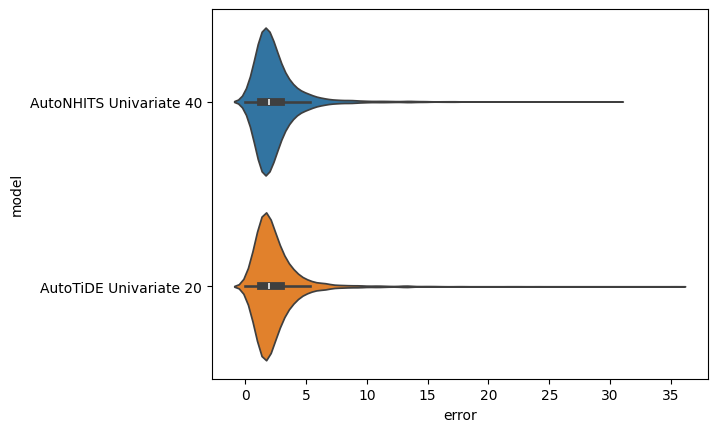

In [ ]:
sns.violinplot(evaluation_df_melted.query('metric=="mae"'), x='error', y='model', hue = 'model')

<Axes: xlabel='error', ylabel='model'>

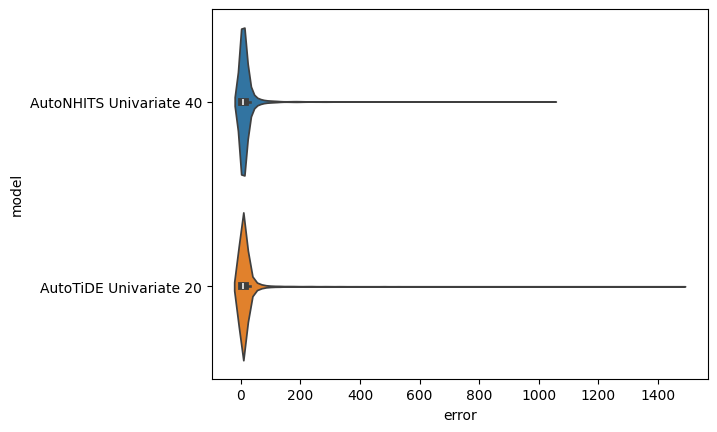

In [ ]:
sns.violinplot(evaluation_df_melted.query('metric=="mse"'), x='error', y='model', hue = 'model')

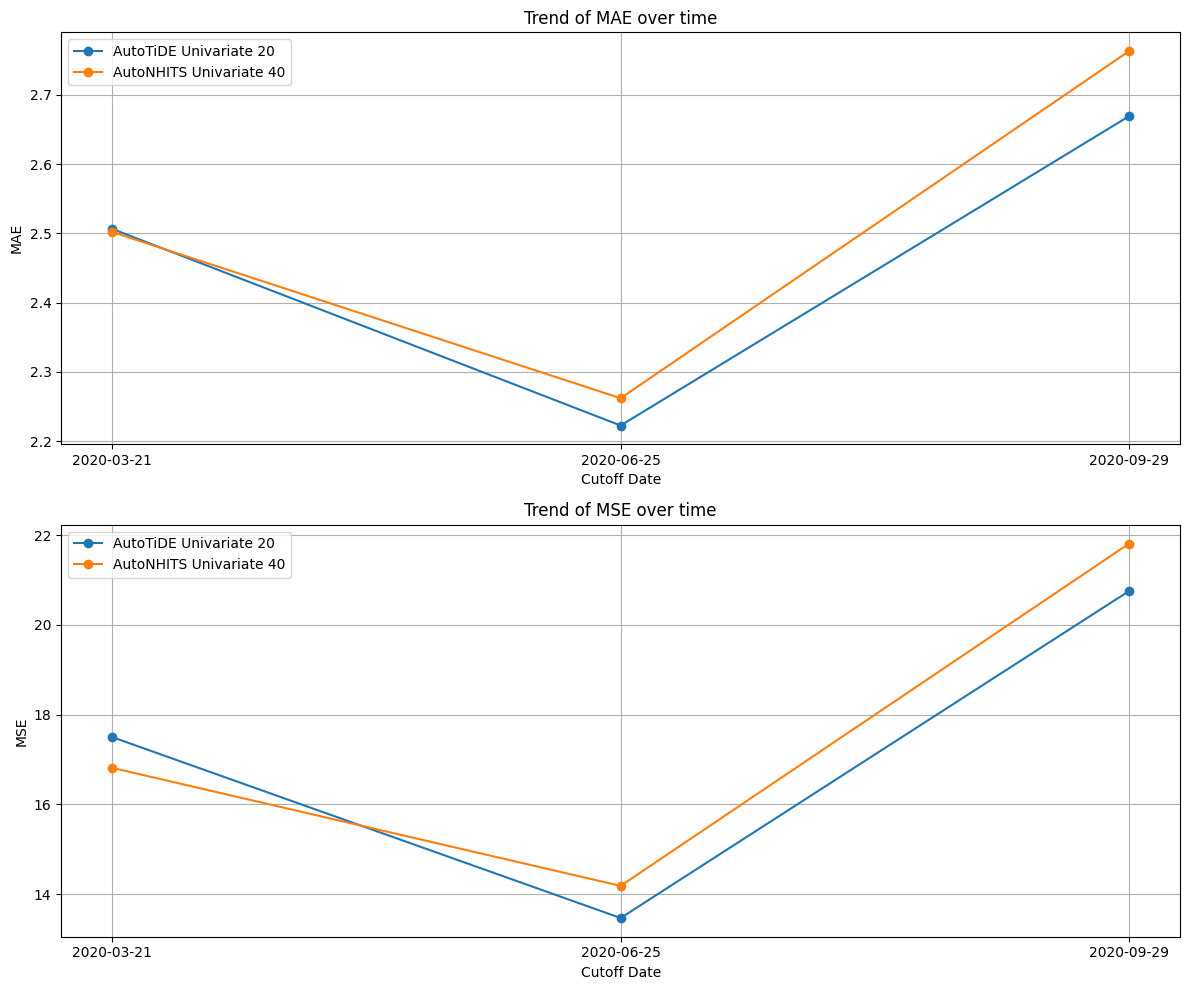

In [ ]:
import matplotlib.pyplot as plt

# Plotting
metrics_new = ['mae', 'mse']
models_new = ['AutoTiDE Univariate 20',	'AutoNHITS Univariate 40']

fig, axes = plt.subplots(2, 1, figsize=(12, 10))

for i, metric in enumerate(metrics_new):
    for model in models_new:
        subset_new = Uni_cut_metric.xs(metric, level='metric')
        axes[i].plot(subset_new.index, subset_new[model], marker='o', label=model)
    axes[i].set_title(f'Trend of {metric.upper()} over time')
    axes[i].set_xlabel('Cutoff Date')
    axes[i].set_ylabel(metric.upper())
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()

<Axes: xlabel='n', ylabel='best_model'>

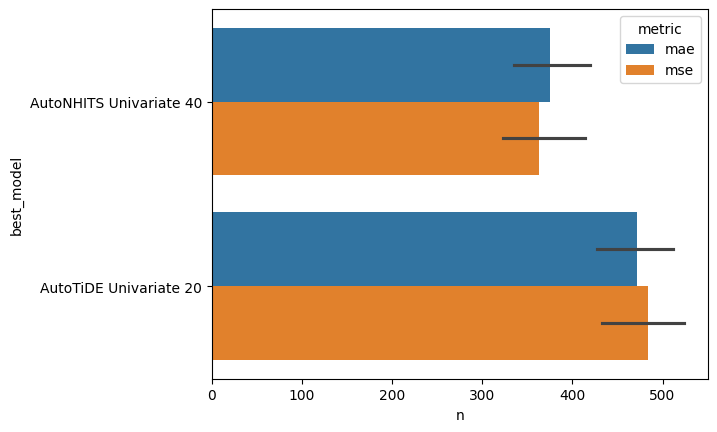

In [ ]:
# Choose the best model for each time series, metric, and cross validation window
Ger_Test_evaluation['best_model'] = Ger_Test_evaluation.idxmin(axis=1, numeric_only=True)
# count how many times a model wins per metric and cross validation window
count_best_model = Ger_Test_evaluation.groupby(['cutoff', 'metric', 'best_model']).size().rename('n').to_frame().reset_index()
# plot results
sns.barplot(count_best_model, x='n', y='best_model', hue='metric')

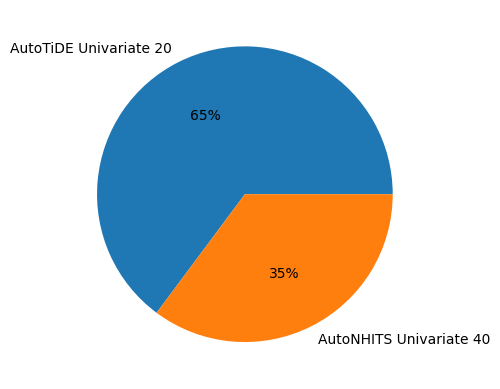

In [ ]:
# For the mse, calculate how many times a model wins
eval_series_df = Ger_Test_evaluation.query('metric == "mse"').groupby(['unique_id']).mean(numeric_only=True)
eval_series_df['best_model'] = eval_series_df.idxmin(axis=1)
counts_series = eval_series_df.value_counts('best_model')
plt.pie(counts_series, labels=counts_series.index, autopct='%.0f%%')
plt.show()

<ipython-input-58-7244419fd8b7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MLPL1_302.rename(columns = {'y' : 'actual'}, inplace = True) # rename actual values.


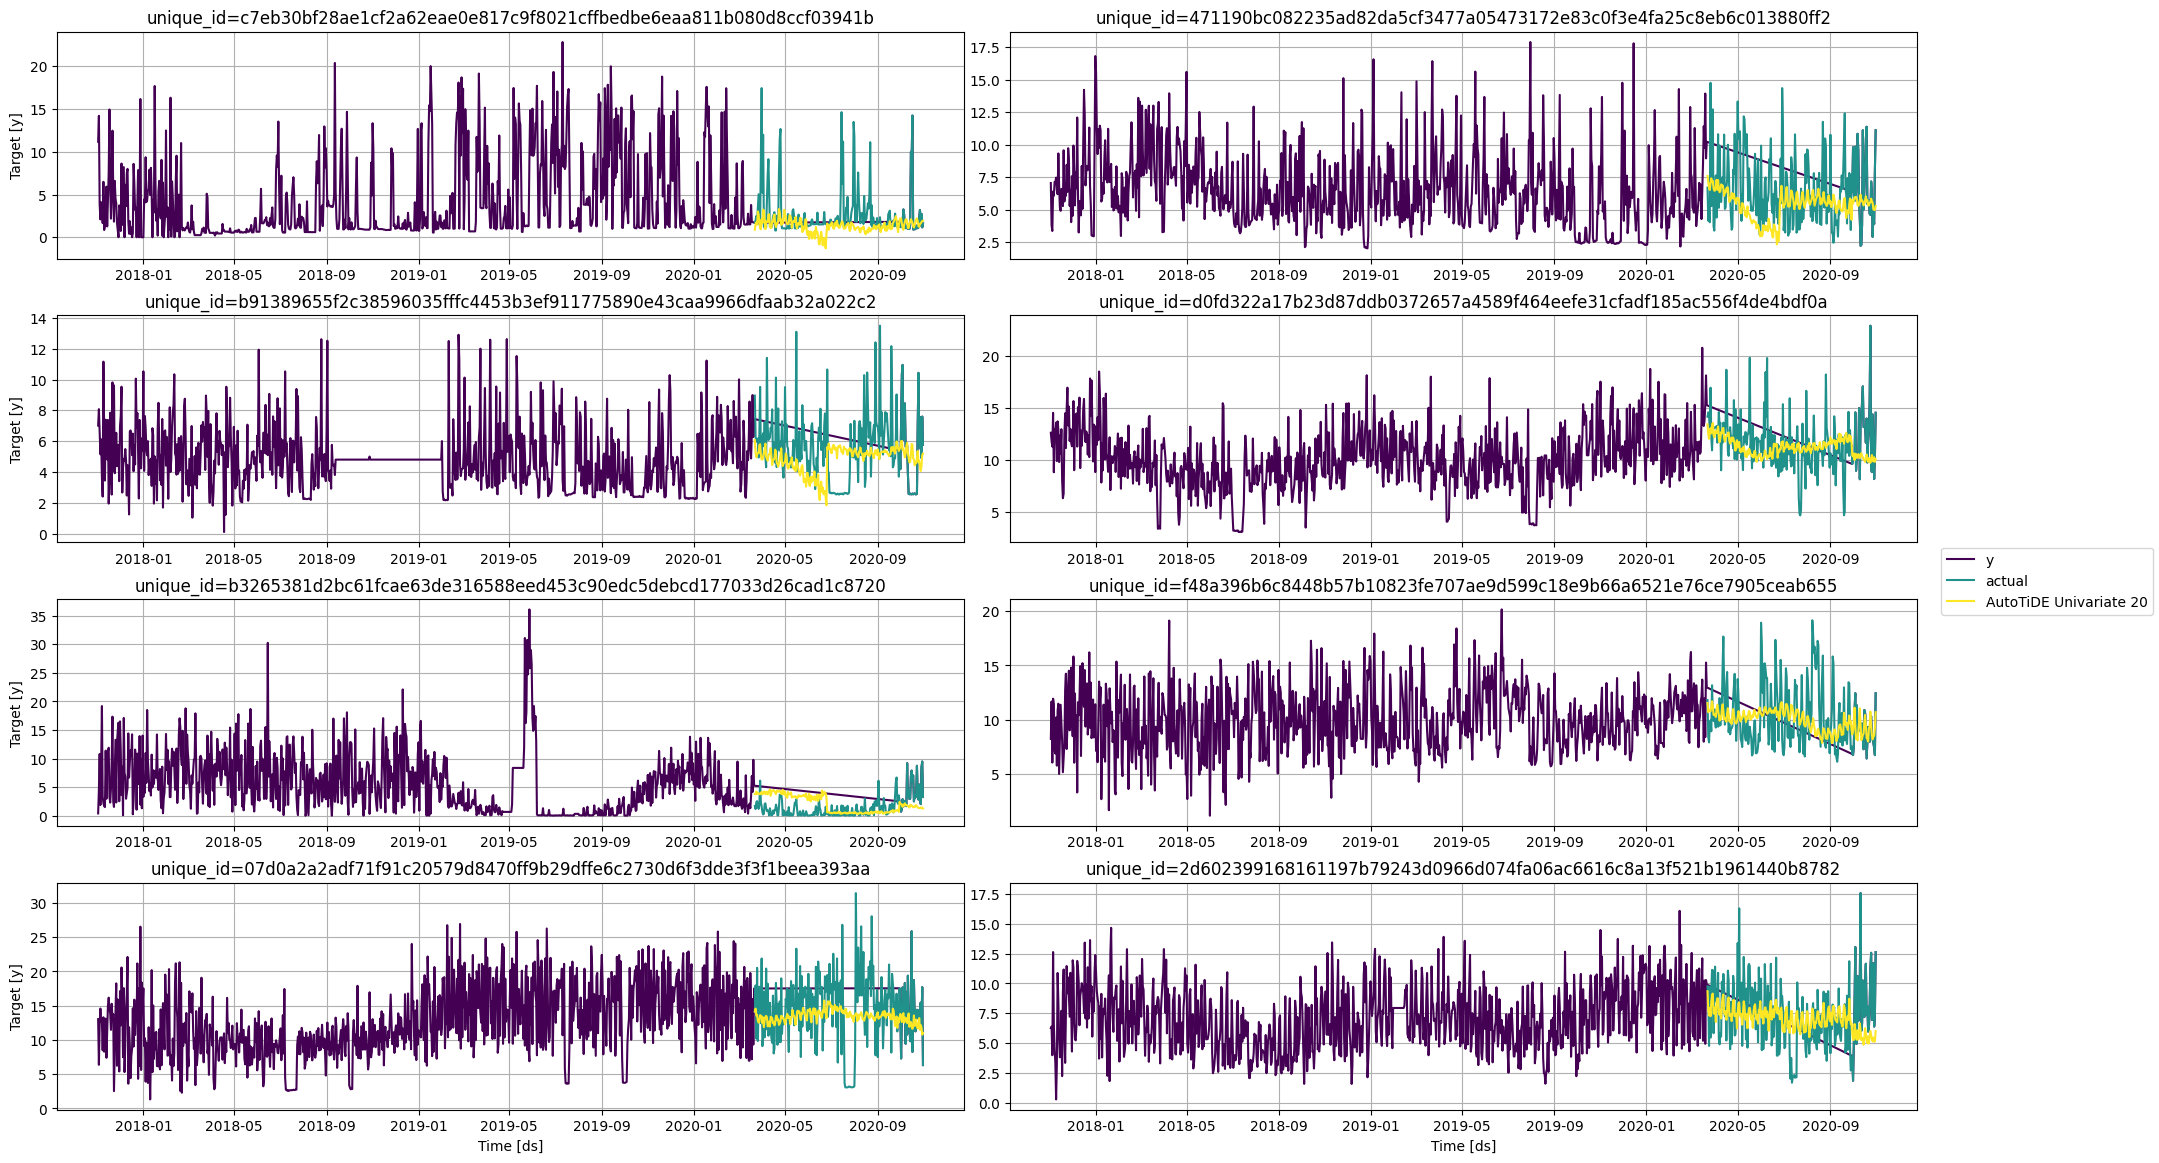

In [ ]:
from utilsforecast.plotting import plot_series
MLPL1_302 = cv_df1[['unique_id', 'ds', 'y', 'cutoff', 'AutoTiDE Univariate 20']]
MLPL1_302
MLPL1_302.rename(columns = {'y' : 'actual'}, inplace = True) # rename actual values.
plot_series(train_test3_Uni, MLPL1_302.loc[:, MLPL1_302.columns != 'cutoff'], max_insample_length=100000)